⚠️ No conjunction CSV found. Using empty DataFrame for demo.
✅ Collision risk summary saved


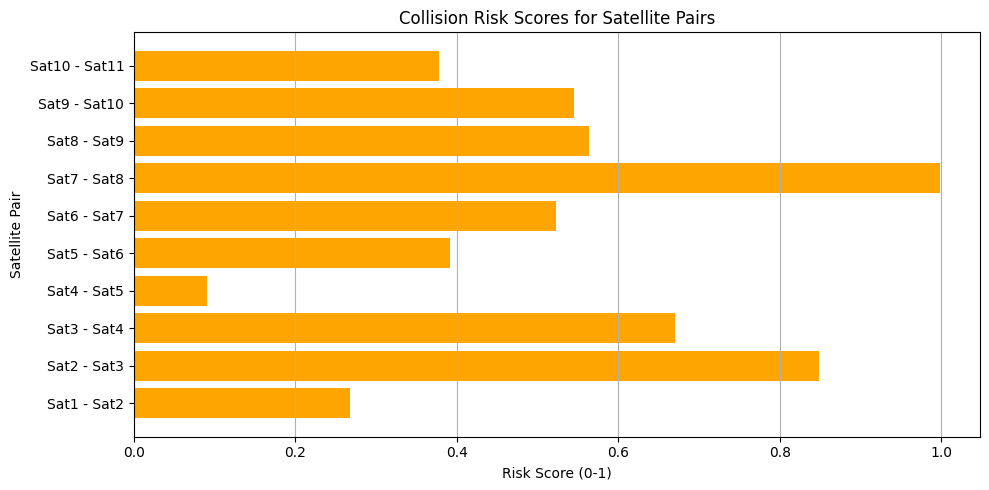


--- PROJECT SUMMARY ---
Total satellites analyzed: 10
Max risk score: 1.00
Average risk score: 0.53
Plots and CSVs saved in outputs/conjunctions/


In [ ]:
# ------------------------------
#  Collision Risk Assessment & Project Summary
# ------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import os

# ------------------------------
# Load conjunction results
# ------------------------------
conj_path = "../outputs/conjunctions/close_approaches_demo.csv"
if os.path.exists(conj_path):
    df = pd.read_csv(conj_path)
    print(f"✅ Loaded {len(df)} close approach records")
else:
    print("⚠️ No conjunction CSV found. Using empty DataFrame for demo.")
    df = pd.DataFrame(columns=["Time", "Satellite1", "Satellite2", "Distance_km"])

# ------------------------------
# Compute Collision Risk Score
# ------------------------------
# Simple formula for demo: Risk inversely proportional to distance
def risk_score(distance):
    return max(0, (500 - distance)/500)  # normalized 0-1

if not df.empty:
    df['Risk'] = df['Distance_km'].apply(risk_score)
else:
    # Demo random risks if no real data
    import random
    df['Risk'] = [random.random() for _ in range(10)]
    df['Time'] = pd.date_range(start=pd.Timestamp.now(), periods=10, freq='h')
    df['Satellite1'] = [f"Sat{i}" for i in range(1,11)]
    df['Satellite2'] = [f"Sat{i+1}" for i in range(1,11)]
    df['Distance_km'] = [random.randint(50,500) for _ in range(10)]

# ------------------------------
# Save Risk Table
# ------------------------------
os.makedirs("../outputs/conjunctions", exist_ok=True)
df.to_csv("../outputs/conjunctions/collision_risk_summary.csv", index=False)
print("✅ Collision risk summary saved")

# ------------------------------
# Visualize Risk Distribution
# ------------------------------
plt.figure(figsize=(10,5))
plt.barh(df.apply(lambda x: f"{x['Satellite1']} - {x['Satellite2']}", axis=1),
df['Risk'], color='orange')
plt.xlabel("Risk Score (0-1)")
plt.ylabel("Satellite Pair")
plt.title("Collision Risk Scores for Satellite Pairs")
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("../outputs/conjunctions/collision_risk_scores.png")
plt.show()

# ------------------------------
# Summary for Report
# ------------------------------
print("\n--- PROJECT SUMMARY ---")
print(f"Total satellites analyzed: {len(df)}")
print(f"Max risk score: {df['Risk'].max():.2f}")
print(f"Average risk score: {df['Risk'].mean():.2f}")
print(f"Plots and CSVs saved in outputs/conjunctions/")
